<a href="https://colab.research.google.com/github/jx-dohwan/Aiffel_Kaggle_manuscript/blob/main/3_Home_Credit_Default_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
# sklearn 범주형 변수 처리를 위한 사전 처리
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# 파일 시스템 관리
import os

# 경고표시안함
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
from google.colab import files

In [35]:
app_train = pd.read_csv('/content/drive/MyDrive/인공지능/아이펠/풀잎_캐글필사/data/HCDR/application_train.csv')
print('Training data shape : ', app_train.shape)
app_train.head()

Training data shape :  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
app_test = pd.read_csv('/content/drive/MyDrive/인공지능/아이펠/풀잎_캐글필사/data/HCDR/application_test.csv')
print('Testing data shape : ', app_test.shape)
app_test.head()

Testing data shape :  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## EDA

### 모든 컬럼의 분포를 조사
- 목표는 우리가 예상하도록 요청받은 것입니다. 대출에 대한 0이 제때 상환되었거나 고객이 지불에 어려움을 겪었음을 나타내는 1이 됩니다. 우리는 먼저 각 범주에 속하는 대출 건수를 조사할 수 있다.

In [37]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

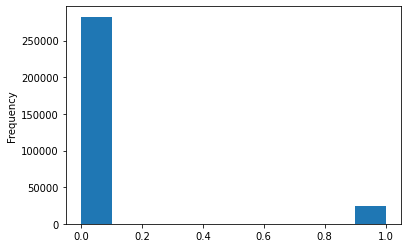

In [38]:
app_train['TARGET'].astype(int).plot.hist();

- 이 정보를 통해 우리는 이것이 불균형한 계급 문제라는 것을 알 수 있다. 제때 갚지 못한 대출보다 제때 갚은 대출이 훨씬 많다. 일단 우리가 더 정교한 기계 학습 모델에 들어가면, 우리는 이러한 불균형을 반영하기 위해 데이터에 있는 그것들의 표현에 의해 클래스들을 가중시킬 수 있다

### 결측치 검사

In [39]:
def missing_values_table(df):
  # 결측값 합계
  mis_val = df.isnull().sum()

  # 결측값 백분율
  mis_val_precent = 100 * df.isnull().sum() / len(df)

  # 결과표 만들기
  mis_val_table = pd.concat([mis_val, mis_val_precent], axis=1)

  # 열 이름 변경
  mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

  # 누락된 내림차순 백분율로 표 정렬
  mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
  
  # 누락된 정보가 있는 데이터 프레임 반환
  return mis_val_table_ren_columns
  

In [40]:
# 결측값 통계량
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


### 컬럼 유형
- 각 데이터 유형의 열 수를 살펴보겠습니다. int64 및 float64는 숫자 변수입니다 (이산 또는 연속 일 수 있음). 객체 열은 문자열을 포함하며 범주형 피쳐입니다.



In [41]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

- 이제 각 개체(범주형) 열의 고유한 항목 수를 살펴보겠습니다.

In [42]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### 변주형 변수 인코딩
- 레이블 인코딩: 범주형 변수의 각 고유 범주를 정수로 지정합니다. 새 열이 생성되지 않습니다. 예는 아래에 나와 있습니다.
- 원-핫 인코딩: 범주형 변수의 각 고유 범주에 대해 새 열을 만듭니다. 각 관측치는 해당 범주에 대해 열에 1을, 다른 모든 새 열에 0을 수신합니다

> 위에서 설명한 정책을 구현해 보겠습니다. 두 개의 고유한 범주가 있는 범주형 변수(dtype == 개체)에 대해 레이블 인코딩을 사용하고, 두 개 이상의 고유한 범주가 있는 범주형 변수에 대해 원-핫 인코딩을 사용합니다.

> 레이블 인코딩의 경우 Scikit-Learn Label Encoder를 사용하고 원핫 인코딩의 경우 팬더 get_dummies(df) 함수를 사용합니다.

In [43]:
# 레이블 인코더 객체 만들기

le = LabelEncoder()
le_count = 0

# 컬럼을 통해 반복
for col in app_train:
  if app_train[col].dtype == 'object':
    if len(list(app_train[col].unique())) <= 2:
      # 두 개 이하의 고유한 범주인 경우
      le.fit(app_train[col])
      #교육 및 테스트 데이터 모두 혁신
      app_train[col] = le.transform(app_train[col])
      app_test[col] = le.transform(app_test[col])

      #레이블로 인코딩된 열 수를 추적합니다.
      le_count += 1

print('%d columns where label endoded'%le_count)

3 columns where label endoded


In [45]:
# 범주형 변수의 원핫 인코딩
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape : ', app_train.shape)
print('Testing Features shape : ',app_test.shape)

Training Features shape :  (307511, 243)
Testing Features shape :  (48744, 239)


### 학습 및 테스트 데이터 정렬

- 교육 및 테스트 데이터 모두에 동일한 기능(열)이 있어야 합니다. 원핫 인코딩은 테스트 데이터에 표시되지 않는 범주가 있는 일부 범주형 변수가 있었기 때문에 교육 데이터에 더 많은 열을 생성했다. 테스트 데이터에 없는 교육 데이터의 열을 제거하려면 데이터 프레임을 정렬해야 합니다. 먼저 교육 데이터에서 대상 열을 추출합니다(테스트 데이터에는 없지만 이 정보를 유지해야 하기 때문입니다). 정렬을 수행할 때 축 = 1을 설정하여 데이터 프레임을 행이 아닌 열을 기준으로 정렬해야 합니다!


In [46]:
train_labels = app_train['TARGET']

#교육 및 테스트 데이터를 정렬하고 두 데이터 프레임에 열만 있음
app_train, app_test = app_train.align(app_test, join = 'inner', axis=1)

# ADD the target back in
app_train['TARGET'] = train_labels

print('Training Features shape : ',app_train.shape)
print('Testing Features shape : ', app_test.shape)

Training Features shape :  (307511, 240)
Testing Features shape :  (48744, 239)


- 이제 교육 및 테스트 데이터 세트는 기계 학습에 필요한 것과 동일한 기능을 가지고 있다. 원핫 인코딩으로 인해 기능의 수가 크게 증가했다. 어느 시점에서 우리는 데이터 세트의 크기를 줄이기 위해 차원 축소(관련되지 않은 기능 제거)를 시도하고 싶을 것이다.

## 탐색적 데이터 분석으로 돌아가기